# Fraud Email Detection
This project discusses the use of Fraud email detection.

In [1]:
import re
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
import PyPDF2
import pdfplumber
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from tkinter import scrolledtext, filedialog

## Preprocessing Data
This section discusses the preprocessing of the email text, removing the headers and the unnecessary characters.

### Import re
https://www.w3schools.com/python/python_regex.asp
### Import nbformat
https://nbformat.readthedocs.io/en/latest/
###  Import Tkinter
https://docs.python.org/3/library/tkinter.html
### import PyPDF2
https://pypdf2.readthedocs.io/en/3.x/
### Scrolledtext
https://docs.python.org/3/library/tkinter.scrolledtext.html
### filedialog
https://docs.python.org/3/library/dialog.html
### pdfplumber
https://medium.com/@karthickrajm/how-to-extract-table-from-pdf-using-python-pdfplumber-a2010b184431
### x.strip()
https://www.w3schools.com/python/ref_string_strip.asp

In [2]:
def cl_em_text(email_text):
    # Remove URLs, numbers, and punctuation
    email_text = re.sub(r'http\S+', '', email_text, flags=re.IGNORECASE)
    email_text = re.sub(r'\b\d+\b', '', email_text)
    email_text = re.sub(r'[^\w\s]', ' ', email_text)  # Replace punctuation with space
    # Collapse multiple spaces/newlines
    email_text = re.sub(r'\s+', ' ', email_text)
    return email_text.lower().strip()

## Feature Extraction
Now, we would extract features for further processing
### sklearn
https://scikit-learn.org/stable/index.html
### vetorizer

### CountVectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [3]:
def extract_features(email_texts):
    """
    Converts emails into numerical features
    """
    vectorizer = CountVectorizer(stop_words = 'english', max_features = 1000)
    features = vectorizer.fit_transform(email_texts)
    return features, vectorizer

## Model training
This step would train the model for further classification of spam/not spam emails
### Train_Test_Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
### MultinomialNB()
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
### Accuracy_Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
### Joblib.dump
https://www.geeksforgeeks.org/massively-speed-up-processing-using-joblib-in-python/

In [4]:
def tr_model(features, labels):
    """
    Training the machine learning model for email scam detection
    """
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
    model = MultinomialNB()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(f"Model Accuracy: {accuracy_score(Y_test, predictions)}")
    joblib.dump(model, "scam_detector_model.pkl")
    return model

## Email Scanning
After model training, the model would scan emails and load the email scanner model.

In [5]:
def scan_email(email_text, vectorizer, model):
    clean_text = cl_em_text(email_text)
    features = vectorizer.transform([clean_text])
    prediction = model.predict(features)
    return "Scam" if prediction[0] == 1 else "Not Scam"

def classify_email(email_input, result_label, vectorizer, model):
    email_text = email_input.get("1.0", tk.END).strip()
    if email_text:
        result = scan_email(email_text, vectorizer, model)
        result_label.config(text=f"Classification: {result}")
    else:
        result_label.config(text="Error: No text to classify!")

def open_pdfs(email_input):
    file_path = filedialog.askopenfilename(filetypes=[("PDF Files", "*.pdf")])
    if file_path:
        try:
            with open(file_path, "rb") as file:
                reader = PyPDF2.PdfReader(file)
                text = ""
                for page in reader.pages:
                    if page.extract_text():  # Corrected method name
                        text += page.extract_text() + "\n"  # Add newline between pages
                email_input.delete("1.0", tk.END)
                email_input.insert(tk.END, text.strip())  # Insert cleaned text
        except Exception as e:
            print(f"Error reading PDF: {e}")

## Loading datasets/utils
Now, after creating a model, we would add the datasets using pandas

### pandas
https://www.w3schools.com/python/pandas/default.asp
### read_csv
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [6]:
def load_dataset(file_path):
    """
    Loads the dataset from a CSV file and extracts emails and labels.
    """
    df = pd.read_csv(file_path)
    df.dropna(inplace=True)  # Remove any null values
    return df['email_text'], df['labels']

## Defining main
This is the final function, where all the previous models are called and the detection is processed.

In [7]:
def plot_distribution(labels):
    """
    Plots the distribution of scam vs non-scam emails
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(x=labels, palette="coolwarm")
    plt.title("Email Scam vs Non-Scam Distribution")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

Model Accuracy: 1.0


C:\Users\ihpc\AppData\Local\Temp\ipykernel_4456\2691758510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="coolwarm")


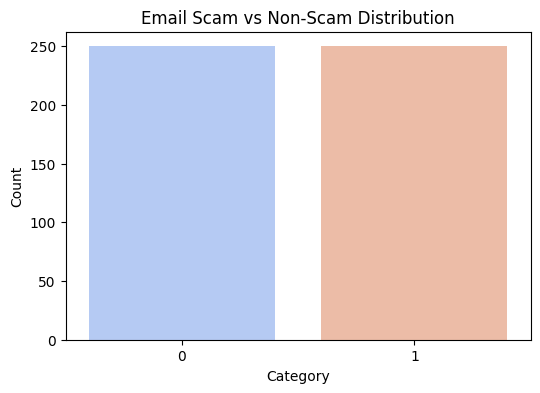

In [8]:
def main():
    data_file = "emails.csv"
    emails, labels = load_dataset(data_file)
    features, vectorizer = extract_features(emails)
    model = tr_model(features, labels)

    top = tk.Tk()
    top.title("Email Fraud Detector")

    tk.Label(top, text="Enter Email Content: ").pack()
    email_input = scrolledtext.ScrolledText(top, height=10, width=50)
    email_input.pack()

    result_label = tk.Label(top, text="Classification: ", font=("Arial", 12))
    result_label.pack()

    # Pass the required variables to the functions using lambda
    tk.Button(top, text="Classify", command=lambda: classify_email(email_input, result_label, vectorizer, model)).pack()
    tk.Button(top, text="Open PDFs", command=lambda: open_pdfs(email_input)).pack()

    top.mainloop()
    plot_distribution(labels)

if __name__ == "__main__":
    main()

# Thank you